## Importing Libraries 

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing 

### Training Image Preprocessing 

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

Found 70295 files belonging to 38 classes.


In [3]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

### Validation Image Processing 

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

Found 17572 files belonging to 38 classes.


In [5]:
for x,y in validation_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[172.   170.   171.  ]
   [175.75 173.75 174.75]
   [168.75 166.75 167.75]
   ...
   [172.75 172.75 174.75]
   [172.   172.   174.  ]
   [177.25 177.25 179.25]]

  [[169.25 167.25 168.25]
   [170.   168.   169.  ]
   [179.25 177.25 178.25]
   ...
   [170.25 170.25 172.25]
   [170.5  170.5  172.5 ]
   [173.5  173.5  175.5 ]]

  [[174.25 172.25 173.25]
   [172.   170.   171.  ]
   [175.25 173.25 174.25]
   ...
   [171.25 171.25 173.25]
   [172.25 172.25 174.25]
   [172.75 172.75 174.75]]

  ...

  [[111.75 108.75 103.75]
   [118.75 115.75 110.75]
   [113.5  110.5  105.5 ]
   ...
   [105.   101.    98.  ]
   [114.   110.   107.  ]
   [114.75 110.75 107.75]]

  [[115.   112.   107.  ]
   [110.25 107.25 102.25]
   [ 98.75  95.75  90.75]
   ...
   [109.75 105.75 102.75]
   [105.75 101.75  98.75]
   [115.   111.   108.  ]]

  [[111.25 108.25 103.25]
   [118.25 115.25 110.25]
   [111.   108.   103.  ]
   ...
   [106.25 102.25  99.25]
   [110.75 106.75 103.75]
   [113.75 109.75 10

## Building Model

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential



In [7]:
model = Sequential()

## Building Convolution Layer

In [8]:
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape=[128,128,3]))
model.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))

In [9]:
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu', input_shape=[128,128,3]))
model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))

In [10]:
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu', input_shape=[128,128,3]))
model.add(Conv2D(filters = 128, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))

In [11]:
model.add(Conv2D(filters = 256, kernel_size = 3, padding = 'same', activation = 'relu', input_shape=[128,128,3]))
model.add(Conv2D(filters = 256, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))

In [12]:
model.add(Conv2D(filters = 512, kernel_size = 3, padding = 'same', activation = 'relu', input_shape=[128,128,3]))
model.add(Conv2D(filters = 512, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))

In [13]:
model.add(Dropout(0.25))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units = 1500, activation = 'relu'))

In [16]:
model.add(Dropout(0.4))

In [17]:
# Output layer
model.add(Dense(units = 38, activation = 'softmax'))

## Compiling Model

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001,
), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

## Model Training 

In [20]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
1072/2197 [=============>................] - ETA: 1:29 - loss: 1.9042 - accuracy: 0.4492

KeyboardInterrupt: 

## Model Evaluation 

In [68]:
#Model Evaluation on Training Set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 75s 34ms/step - loss: 0.0386 - accuracy: 0.9872


In [69]:
print(train_loss,train_acc)

0.03863311558961868 0.9871541261672974


In [70]:
# Model on Validation Set
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 17s 30ms/step - loss: 0.1304 - accuracy: 0.9610


In [71]:
print(val_loss,val_acc)

0.13039317727088928 0.9610175490379333


## Saving Model

In [76]:
model.save("trained_model.keras")

In [77]:
training_history.history

{'loss': [1.339331865310669,
  0.43192020058631897,
  0.2561013698577881,
  0.17900480329990387,
  0.13418711721897125,
  0.10608869045972824,
  0.08588302880525589,
  0.07311806082725525,
  0.05996405705809593,
  0.055401865392923355],
 'accuracy': [0.6060032844543457,
  0.8633615374565125,
  0.9163951873779297,
  0.9417312741279602,
  0.9560424089431763,
  0.9650757312774658,
  0.9714915752410889,
  0.9763568043708801,
  0.9804964661598206,
  0.9822604656219482],
 'val_loss': [0.45446792244911194,
  0.2958182394504547,
  0.22770623862743378,
  0.16633263230323792,
  0.13361813127994537,
  0.13334181904792786,
  0.13600517809391022,
  0.12950767576694489,
  0.08181695640087128,
  0.13039317727088928],
 'val_accuracy': [0.8560209274291992,
  0.9029137492179871,
  0.9263601303100586,
  0.946790337562561,
  0.9573753476142883,
  0.9580582976341248,
  0.9558388590812683,
  0.9597086310386658,
  0.9749601483345032,
  0.9610175490379333]}

In [78]:
# Recording History In JSON
import json 
with open("training_hist.JSON",'w') as f:
    json.dump(training_history.history, f)

## Accuracy Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

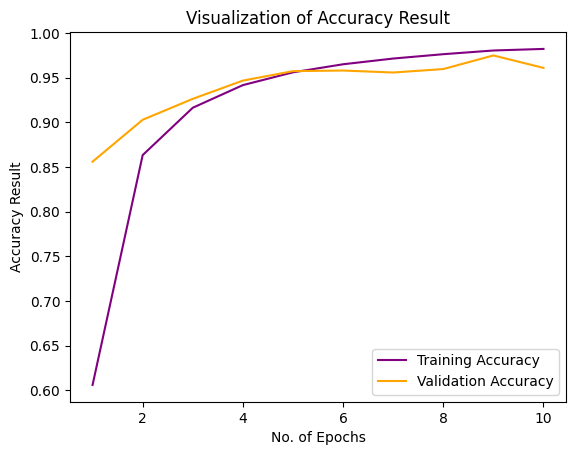

In [90]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color = 'purple' , label = 'Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color = 'orange' , label = 'Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show

## Some Other Matrices For Model Evaluation 

In [91]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [93]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

Found 17572 files belonging to 38 classes.


In [95]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 28s 41ms/step


(array([[1.0000000e+00, 3.0634311e-11, 9.3140319e-14, ..., 2.3744434e-19,
         6.6302720e-18, 5.7927495e-15],
        [9.9999487e-01, 9.8058990e-08, 9.7695366e-11, ..., 1.5940436e-13,
         7.1453840e-13, 2.7185809e-10],
        [1.0000000e+00, 2.9368719e-11, 1.8567507e-11, ..., 3.8154413e-18,
         2.6549165e-16, 4.3358432e-13],
        ...,
        [2.4019134e-10, 2.5096451e-12, 2.4876039e-08, ..., 7.3940930e-11,
         5.3299500e-12, 9.9998522e-01],
        [3.0538012e-09, 1.9517326e-12, 8.0179356e-09, ..., 3.7999931e-10,
         8.9230845e-12, 9.9999952e-01],
        [1.0375249e-11, 1.8513520e-12, 6.8811568e-11, ..., 7.5080003e-12,
         1.5605671e-10, 9.9999368e-01]], dtype=float32),
 (17572, 38))

In [97]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories


<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [98]:
true_categories = tf.concat([y for x,y in test_set],axis = 0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [99]:
Y_true = tf.argmax(true_categories,axis = 1)
Y_true


<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [103]:
from sklearn.metrics import classification_report, confusion_matrix

In [102]:
print(classification_report(Y_true,predicted_categories, target_names = class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.95      0.96       504
                                 Apple___Black_rot       0.98      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.98       440
                                   Apple___healthy       0.99      0.94      0.96       502
                               Blueberry___healthy       0.98      0.97      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      1.00      0.99       421
                 Cherry_(including_sour)___healthy       0.95      1.00      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.90      0.92       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.96      0.

In [105]:
cm = confusion_matrix(Y_true,predicted_categories)
cm,cm.shape

(array([[480,   6,   0, ...,   0,   0,   0],
        [  0, 492,   1, ...,   0,   0,   0],
        [  0,   0, 426, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 488,   0,   0],
        [  0,   0,   0, ...,   0, 446,   0],
        [  0,   0,   1, ...,   0,   0, 463]], dtype=int64),
 (38, 38))

## Confusion Matrix Visualization

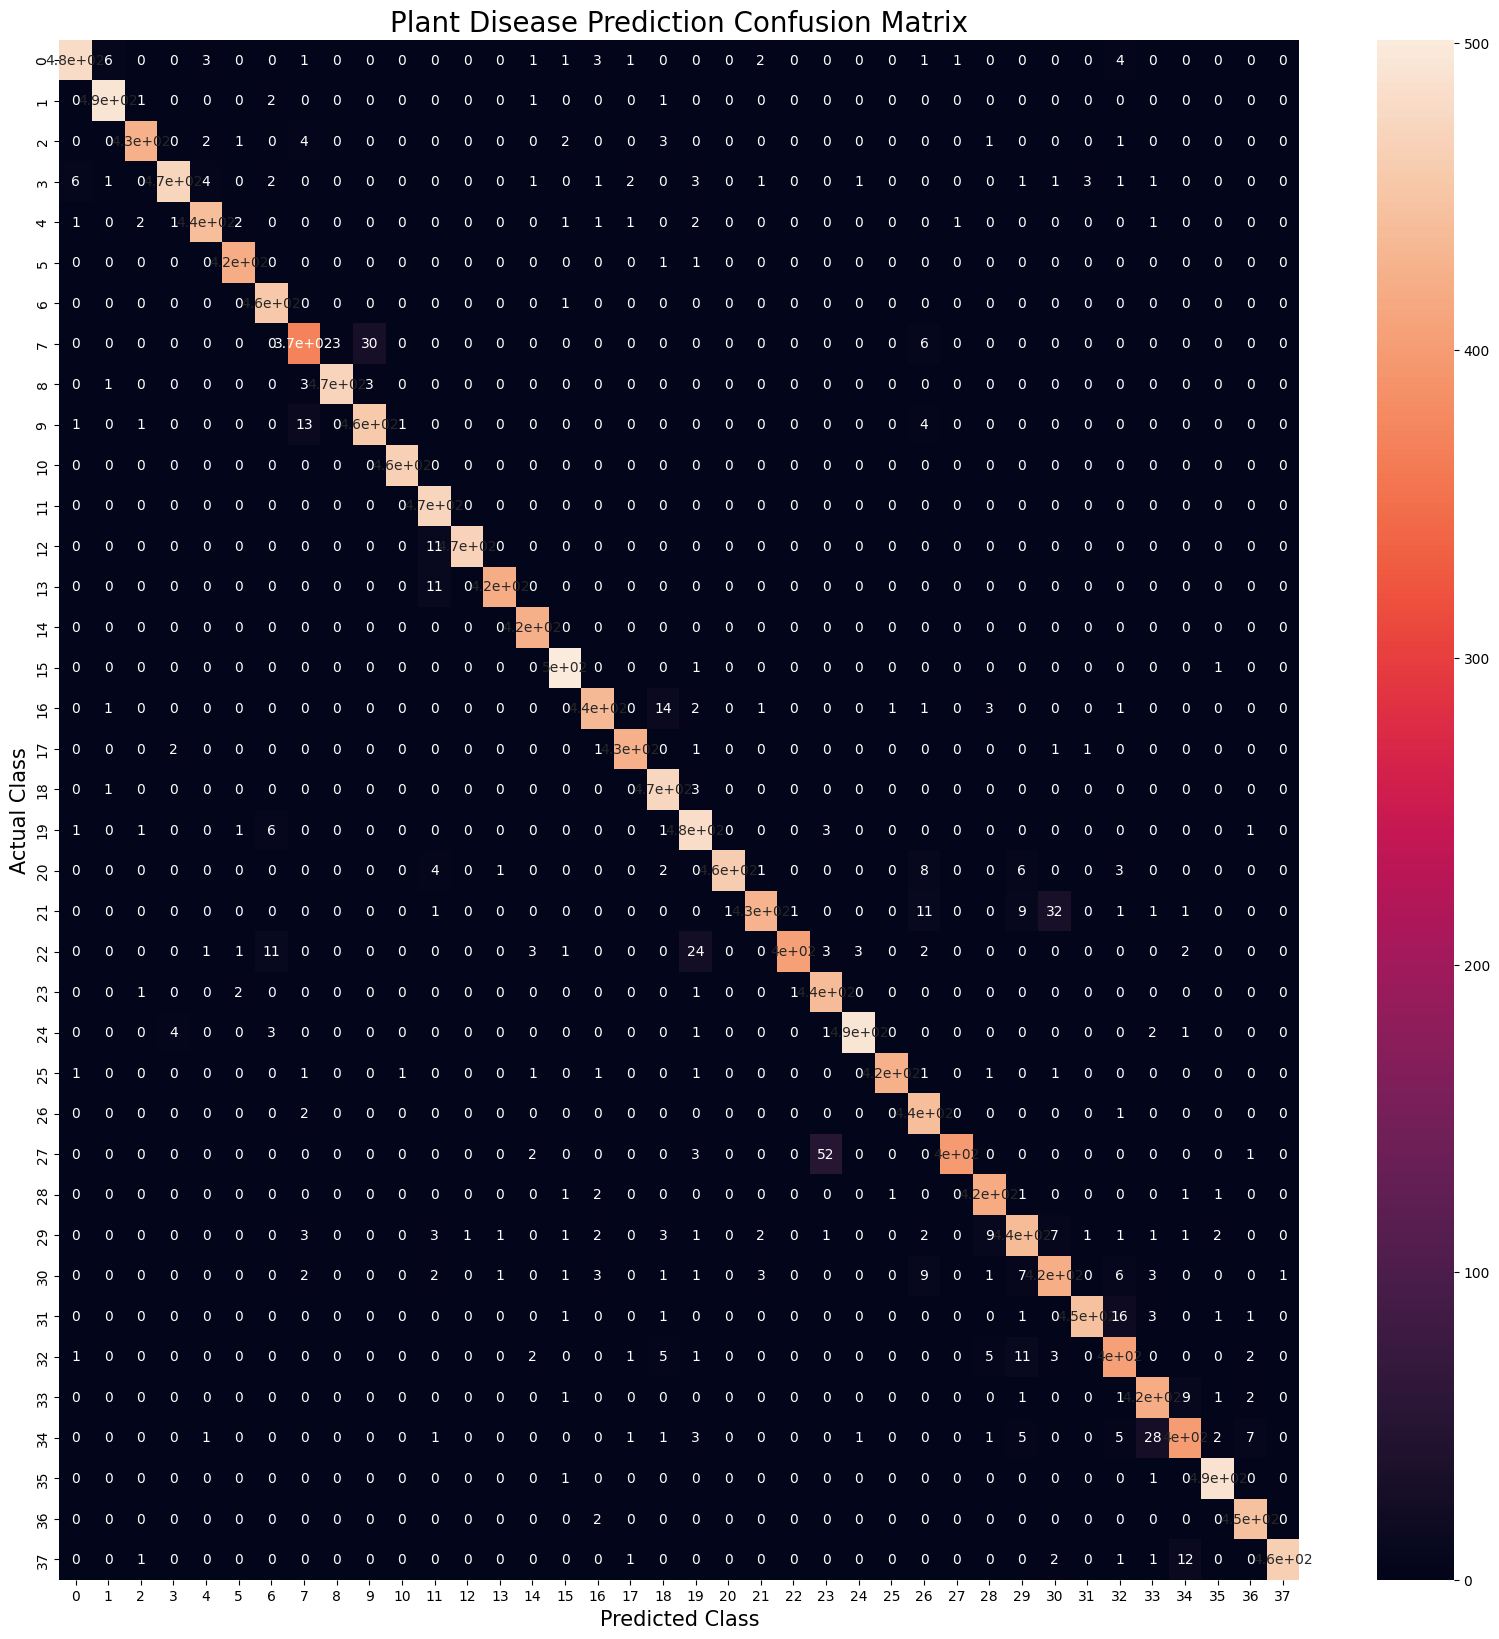

In [122]:
plt.figure(figsize=(20,20))
sns.heatmap(cm,annot = True,annot_kws ={'size':10})
plt.xlabel("Predicted Class",fontsize =  15)
plt.ylabel("Actual Class",fontsize =  15)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize =  20)
plt.show()